In [49]:
#Basic Dependencies
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [3]:
#Read training Data
df_train = pd.read_csv("Train.csv")
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [4]:
#Column Types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    284780 non-null  int64  
 1   StockCode    284780 non-null  int64  
 2   Description  284780 non-null  int64  
 3   Quantity     284780 non-null  int64  
 4   InvoiceDate  284780 non-null  object 
 5   UnitPrice    284780 non-null  float64
 6   CustomerID   284780 non-null  float64
 7   Country      284780 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 17.4+ MB


In [5]:
#Basic Stats
df_train.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000
mean,9955.394083,1573.386807,2023.955573,12.028468,3.451216,15288.224278,32.823846
std,5551.519138,843.604991,1089.812078,295.111588,78.399541,1714.336529,6.743602
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000
25%,5069.000000,939.000000,1141.000000,2.000000,1.250000,13953.000000,35.000000
50%,10310.000000,1521.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000
max,22188.000000,3683.000000,3895.000000,80995.000000,38970.000000,18287.000000,36.000000


In [9]:
print(df_train.shape)
# print(df_test.shape)

(284780, 8)


In [10]:
data = df_train

In [11]:
#Check for Missing Values
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
# Convert invoice date into epoch timestamps
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['timestamp'] = ((data['InvoiceDate'] - dt.datetime(1970,1,1)).dt.total_seconds())/(10**6)
data.drop(columns=["InvoiceDate"], inplace=True)
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,timestamp
0,6141,1583,144,3,3.75,14056.0,35,1304.70084
1,6349,1300,3682,6,1.95,13098.0,35,1305.09930
2,16783,2178,1939,4,5.95,15044.0,35,1321.79520
3,16971,2115,2983,1,0.83,15525.0,35,1321.96362
4,6080,1210,2886,12,1.65,13952.0,35,1304.67240


[Text(0, 0.5, 'UnitPrice'), Text(0.5, 0, 'timestamp')]

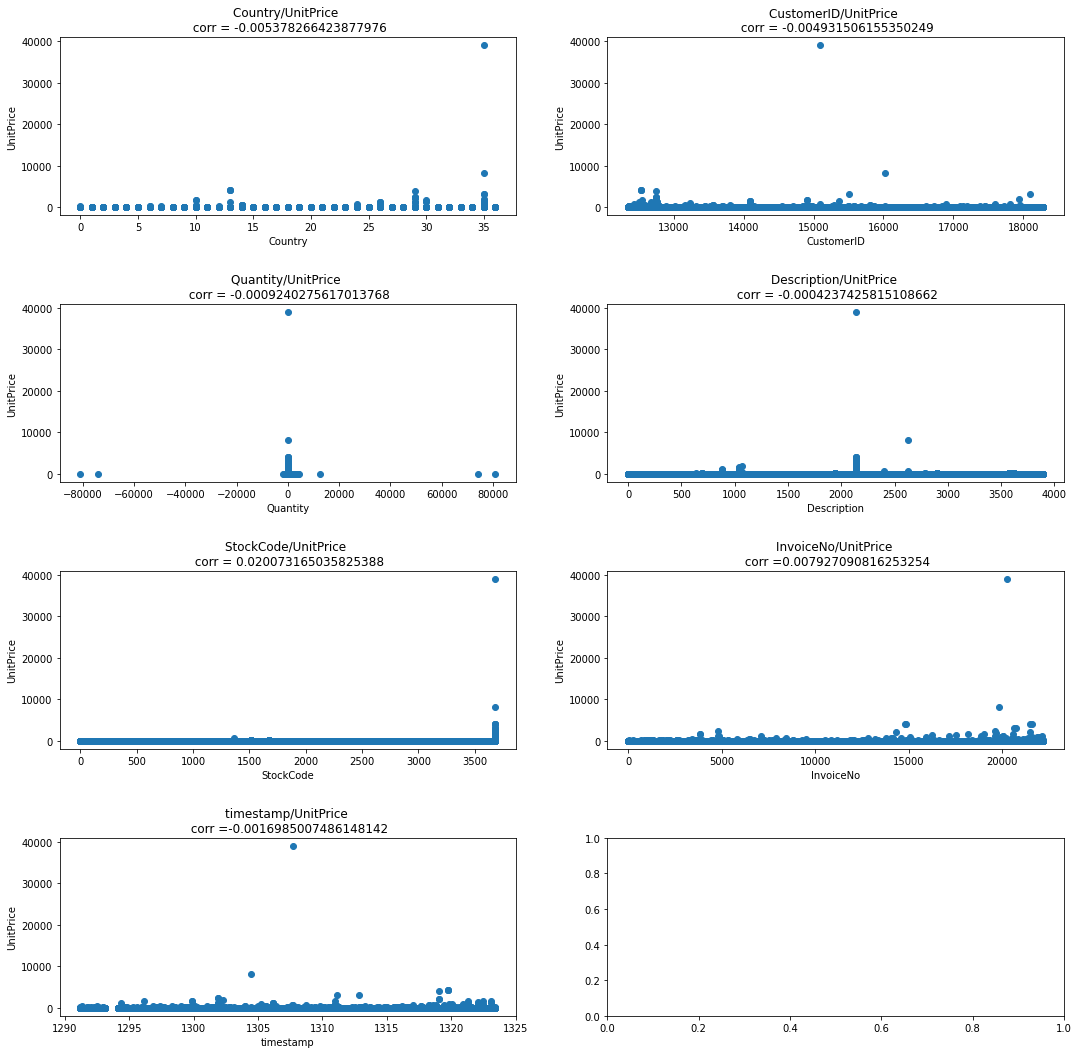

In [13]:
# plot scatter diagrams of all other variables in realtion with unitPrice to find out any outliers
fig, axs = plt.subplots(4, 2, figsize=(18, 18))
plt.subplots_adjust(hspace=0.5)

# Plot for Country vs UnitPrice
axs[0, 0].scatter(data["Country"], data["UnitPrice"])
axs[0, 0].set_title('Country/UnitPrice \n corr = {}'.format(pearsonr(data["Country"],data["UnitPrice"])[0]))
axs[0, 0].set(xlabel='Country', ylabel='UnitPrice')

# Plot for CustomerID vs UnitPrice
axs[0, 1].scatter(data["CustomerID"], data["UnitPrice"])
axs[0, 1].set_title('CustomerID/UnitPrice \n corr = {}'.format(pearsonr(data["CustomerID"],data["UnitPrice"])[0]))
axs[0, 1].set(xlabel='CustomerID', ylabel='UnitPrice')

# Plot for Quantity vs UnitPrice
axs[1, 0].scatter(data["Quantity"], data["UnitPrice"])
axs[1, 0].set_title('Quantity/UnitPrice \n corr = {}'.format(pearsonr(data["Quantity"],data["UnitPrice"])[0]))
axs[1, 0].set(xlabel='Quantity', ylabel='UnitPrice')

# Plot for Discription vs UnitPrice
axs[1, 1].scatter(data["Description"], data["UnitPrice"])
axs[1, 1].set_title('Description/UnitPrice \n corr = {}'.format(pearsonr(data["Description"],data["UnitPrice"])[0]))
axs[1, 1].set(xlabel='Description', ylabel='UnitPrice')

# Plot for StockCode vs UnitPrice
axs[2, 0].scatter(data["StockCode"], data["UnitPrice"])
axs[2, 0].set_title('StockCode/UnitPrice \n corr = {}'.format(pearsonr(data["StockCode"],data["UnitPrice"])[0]))
axs[2, 0].set(xlabel='StockCode', ylabel='UnitPrice')

# Plot for InvoiceNo vs UnitPrice
axs[2, 1].scatter(data["InvoiceNo"], data["UnitPrice"])
axs[2, 1].set_title('InvoiceNo/UnitPrice \n corr ={}'.format(pearsonr(data["InvoiceNo"],data["UnitPrice"])[0]))
axs[2, 1].set(xlabel='InvoiceNo', ylabel='UnitPrice')

# Plot for timestamp vs UnitPrice
axs[3, 0].scatter(data["timestamp"], data["UnitPrice"])
axs[3, 0].set_title('timestamp/UnitPrice \n corr ={}'.format(pearsonr(data["timestamp"],data["UnitPrice"])[0]))
axs[3, 0].set(xlabel='timestamp', ylabel='UnitPrice')

In [ ]:
# saving Correlation for later comparision
correlations = data.corrwith(data["UnitPrice"],method='pearson').to_frame(name="correlation with UnitPrice Before")

Some key points to note based on above charts

first, quantity seem to be symmetric for its min and max 2 values. 

Need further investigation
Surprisingly, Quantity have lowest pearson correaltion coeffiecient with unitPrice

There are very few outliers in each for each chart specifically those two data points are very farther than rest of the data. So, we will get rid of those data-points because this might affect model test accuacy

In [15]:
#=======Investigating Qunatity column outliers

In [16]:
# Investigating Quantity
outliers = data[data['Quantity'] <= -20000]
outliers.style

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,timestamp
180978,22185,2403,2329,-80995,2.080000,16446.000000,35,1323.422820
271013,18958,2001,2002,-74215,1.040000,12346.000000,35,1295.345820


In [17]:
outliers = data[data['Quantity'] >= 20000]
outliers.style

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,timestamp
141379,1909,2001,2002,74215,1.040000,12346.000000,35,1295.344860
210734,18503,2403,2329,80995,2.080000,16446.000000,35,1323.422100


Excatly as I suspected this two data point are very far and symetrical for UnitPrice

So, I decided to drop this 4 entries

In [18]:
# Deleting all the Rows

print("rows before dropping the rows {}".format(len((data.index))))
print("Correlation before dropping the rows", pearsonr(data["Quantity"],data["UnitPrice"])[0])

data.drop(data[data['Quantity'] <= -20000].index, inplace=True) 
data.drop(data[data['Quantity'] >= 20000].index, inplace=True) 

print("\nrows before dropping the rows {}".format(len((data.index))))
print("Correlation After dropping the rows", pearsonr(data["Quantity"],data["UnitPrice"])[0])

rows before dropping the rows 284780
Correlation before dropping the rows -0.0009240275617013768

rows before dropping the rows 284776
Correlation After dropping the rows -0.00564088450077535


In [19]:
#=============Investigating UnitPrice Column outliers

In [20]:
# Cleaning outlying data points
outliers = data[data['UnitPrice']>=5000]
outliers.style

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,timestamp
140723,20237,3681,2140,-1,38970.000000,15098.000000,35,1307.719860
239556,19848,3683,2624,-1,8142.750000,16029.000000,35,1304.427060


Yes! there are only 2 data points having UnitPrice above 5000

Let's drop them

In [21]:
print("rows before dropping the rows {}".format(len((data.index))))
data.drop(data[data['UnitPrice'] >= 5000].index, inplace = True) 
print("rows after dropping the rows {}".format(len((data.index))))

rows before dropping the rows 284776
rows after dropping the rows 284774


In [22]:
#============Let's see how the correlation is improved after cleaning data

[Text(0, 0.5, 'UnitPrice'), Text(0.5, 0, 'timestamp')]

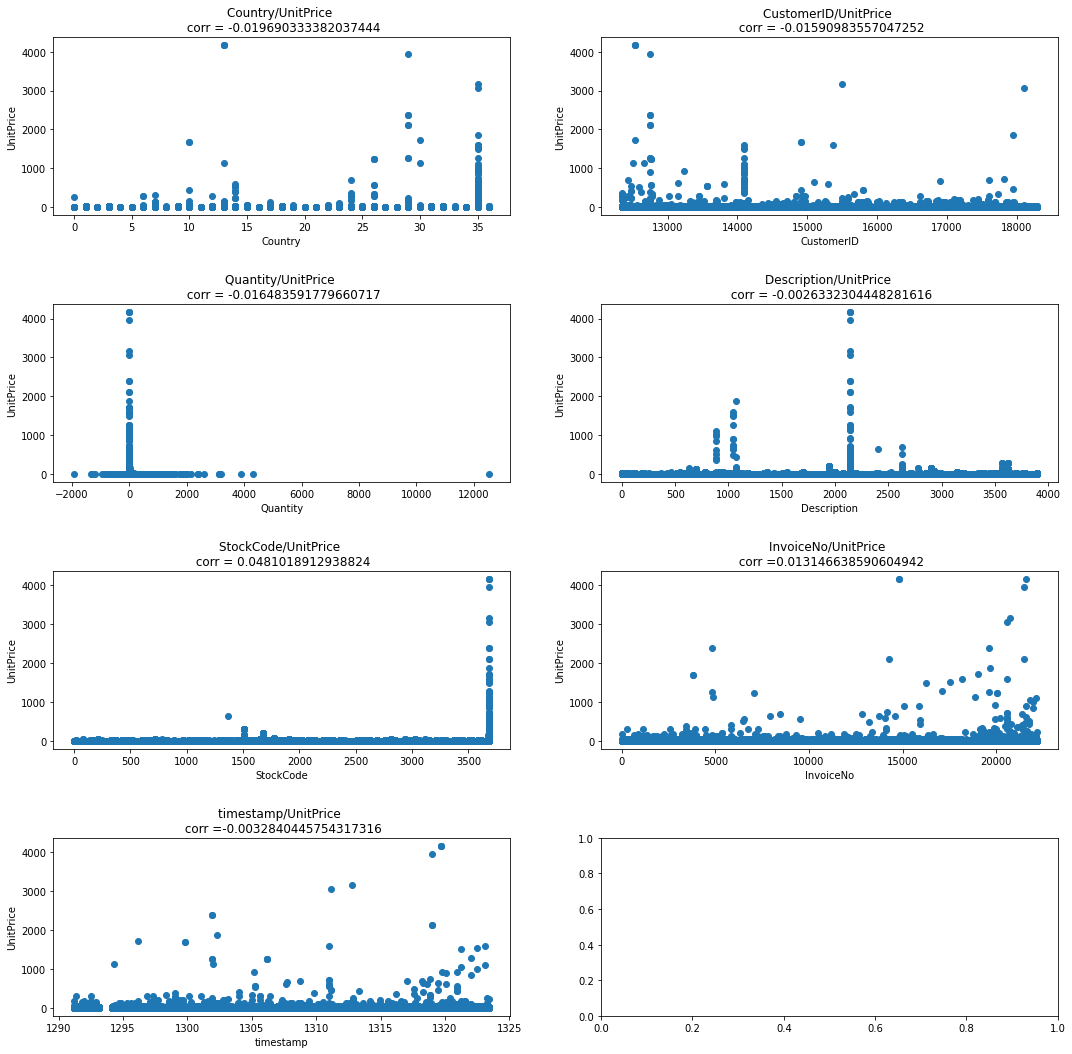

In [23]:
# plot scatter diagrams of all other variables in realtion with unitPrice to find out any outliers
fig, axs = plt.subplots(4, 2, figsize=(18, 18))
plt.subplots_adjust(hspace=0.5)

# Plot for Country vs UnitPrice
axs[0, 0].scatter(data["Country"], data["UnitPrice"])
axs[0, 0].set_title('Country/UnitPrice \n corr = {}'.format(pearsonr(data["Country"],data["UnitPrice"])[0]))
axs[0, 0].set(xlabel='Country', ylabel='UnitPrice')

# Plot for CustomerID vs UnitPrice
axs[0, 1].scatter(data["CustomerID"], data["UnitPrice"])
axs[0, 1].set_title('CustomerID/UnitPrice \n corr = {}'.format(pearsonr(data["CustomerID"],data["UnitPrice"])[0]))
axs[0, 1].set(xlabel='CustomerID', ylabel='UnitPrice')

# Plot for Quantity vs UnitPrice
axs[1, 0].scatter(data["Quantity"], data["UnitPrice"])
axs[1, 0].set_title('Quantity/UnitPrice \n corr = {}'.format(pearsonr(data["Quantity"],data["UnitPrice"])[0]))
axs[1, 0].set(xlabel='Quantity', ylabel='UnitPrice')

# Plot for Discription vs UnitPrice
axs[1, 1].scatter(data["Description"], data["UnitPrice"])
axs[1, 1].set_title('Description/UnitPrice \n corr = {}'.format(pearsonr(data["Description"],data["UnitPrice"])[0]))
axs[1, 1].set(xlabel='Description', ylabel='UnitPrice')

# Plot for StockCode vs UnitPrice
axs[2, 0].scatter(data["StockCode"], data["UnitPrice"])
axs[2, 0].set_title('StockCode/UnitPrice \n corr = {}'.format(pearsonr(data["StockCode"],data["UnitPrice"])[0]))
axs[2, 0].set(xlabel='StockCode', ylabel='UnitPrice')
#axs[2, 0].set_ylim([0, 50])

# Plot for InvoiceNo vs UnitPrice
axs[2, 1].scatter(data["InvoiceNo"], data["UnitPrice"])
axs[2, 1].set_title('InvoiceNo/UnitPrice \n corr ={}'.format(pearsonr(data["InvoiceNo"],data["UnitPrice"])[0]))
axs[2, 1].set(xlabel='InvoiceNo', ylabel='UnitPrice')

# Plot for timestamp vs UnitPrice
axs[3, 0].scatter(data["timestamp"], data["UnitPrice"])
axs[3, 0].set_title('timestamp/UnitPrice \n corr ={}'.format(pearsonr(data["timestamp"],data["UnitPrice"])[0]))
axs[3, 0].set(xlabel='timestamp', ylabel='UnitPrice')

In [24]:
#=========Comparing the correlations before and after data cleaning

In [26]:
#======Run following cell to view before and after data cleaning correlation

In [27]:
# saving Correlation for later comparision
print("Correlation of UnitPrice before and after data cleaning")
correlation_after = data.corrwith(data["UnitPrice"],method='pearson').to_frame()
correlations["correlation with UnitPrice after"] = correlation_after

# Sorting table
correlations["temp"]=correlation_after.abs()
correlations = correlations.sort_values("temp",ascending=False)
correlations.drop(columns=["temp"], inplace=True)
correlations.style

Correlation of UnitPrice before and after data cleaning


NameError: ignored

great! now correlation is much improved by almost double and more in some cases

Do note that negative sign indicate that the two variables are inversely proportional

correlation with country which is -0.019690 is actually higher than -0.003284 which is correlation with timestamp, Even though mathematically speaking later number is bigger that first.

Table above is sorted from high correlation to lowest desendingly

In [28]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,timestamp
0,6141,1583,144,3,3.75,14056.0,35,1304.70084
1,6349,1300,3682,6,1.95,13098.0,35,1305.09930
2,16783,2178,1939,4,5.95,15044.0,35,1321.79520
3,16971,2115,2983,1,0.83,15525.0,35,1321.96362
4,6080,1210,2886,12,1.65,13952.0,35,1304.67240


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284774 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    284774 non-null  int64  
 1   StockCode    284774 non-null  int64  
 2   Description  284774 non-null  int64  
 3   Quantity     284774 non-null  int64  
 4   UnitPrice    284774 non-null  float64
 5   CustomerID   284774 non-null  float64
 6   Country      284774 non-null  int64  
 7   timestamp    284774 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 19.6 MB


In [30]:
#Seperate Categorical and Numerical Columns
cat_cols = data.select_dtypes(include=['object','category']).columns.tolist()
print(cat_cols)

num_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
print(num_cols)

[]
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'CustomerID', 'Country', 'timestamp']


In [31]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: data[col].nunique(), cat_cols))
d = dict(zip(cat_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[]

In [32]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,timestamp
0,6141,1583,144,3,3.75,14056.0,35,1304.70084
1,6349,1300,3682,6,1.95,13098.0,35,1305.09930
2,16783,2178,1939,4,5.95,15044.0,35,1321.79520
3,16971,2115,2983,1,0.83,15525.0,35,1321.96362
4,6080,1210,2886,12,1.65,13952.0,35,1304.67240


In [33]:
#Drop irrelavent columns
data1 = data.drop(['InvoiceNo'],1, inplace= False)
data1.head()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,timestamp
0,1583,144,3,3.75,14056.0,35,1304.70084
1,1300,3682,6,1.95,13098.0,35,1305.09930
2,2178,1939,4,5.95,15044.0,35,1321.79520
3,2115,2983,1,0.83,15525.0,35,1321.96362
4,1210,2886,12,1.65,13952.0,35,1304.67240


In [34]:
#Check for skewness in the dataset
data1.skew()

StockCode        0.271233
Description     -0.133954
Quantity        78.509600
UnitPrice      111.877840
CustomerID       0.029540
Country         -3.050083
timestamp       -0.411593
dtype: float64

111.8778399124649

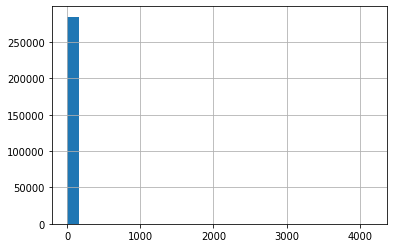

In [35]:
data1.UnitPrice.hist(bins = 25)
print()
data1.UnitPrice.skew()
#Highly skewed scaling needs to done before applying any regression model

In [36]:
corr_matrix = data1.corr(method='pearson')
corr_matrix

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,timestamp
StockCode,1.000000,-0.013238,-0.005743,0.048102,0.002886,0.006233,0.085254
Description,-0.013238,1.000000,0.001185,-0.002633,-0.005230,-0.014793,0.027857
Quantity,-0.005743,0.001185,1.000000,-0.016484,-0.017888,-0.048840,-0.007524
UnitPrice,0.048102,-0.002633,-0.016484,1.000000,-0.015910,-0.019690,-0.003284
CustomerID,0.002886,-0.005230,-0.017888,-0.015910,1.000000,0.388205,-0.002762
Country,0.006233,-0.014793,-0.048840,-0.019690,0.388205,1.000000,0.007065
timestamp,0.085254,0.027857,-0.007524,-0.003284,-0.002762,0.007065,1.000000


In [37]:
#corrleation with area
corr_matrix.UnitPrice.sort_values(ascending=False)

UnitPrice      1.000000
StockCode      0.048102
Description   -0.002633
timestamp     -0.003284
CustomerID    -0.015910
Quantity      -0.016484
Country       -0.019690
Name: UnitPrice, dtype: float64

In [38]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html
#Take targate variable into y
y = data1['UnitPrice']
X = data1.drop('UnitPrice',axis = 1)

from sklearn.preprocessing import PowerTransformer
y = y.values.reshape(-1,1)
# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True)
y = power.fit_transform(y)

In [39]:
# Split data into train and test format
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
=linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lm = LinearRegression()
model=lm.fit(X_train, y_train)
lm.intercept_

array([8.15868762])

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
r2 = metrics.r2_score(y_test, predictions)

print('MAE (Mean Absolute Error): %s' %mae)
print('MSE (Mean Squared Error): %s' %mse)
print('RMSE (Root mean squared error): %s' %rmse)
print('R2 score: %s' %r2)

MAE (Mean Absolute Error): 0.7940781334574697
MSE (Mean Squared Error): 0.9912415777058106
RMSE (Root mean squared error): 0.9956111578853516
R2 score: 0.010952565712424311


In [ ]:
from sklearn.model_selection import cross_val_score
mse_ng=cross_val_score(lm,X,y,scoring='neg_mean_squared_error',cv=5)
mse_ng
mean_mse=np.mean(mse_ng)
print(mean_mse)

-0.9688207745366404


Text(0.5, 1.0, 'Model prediction')

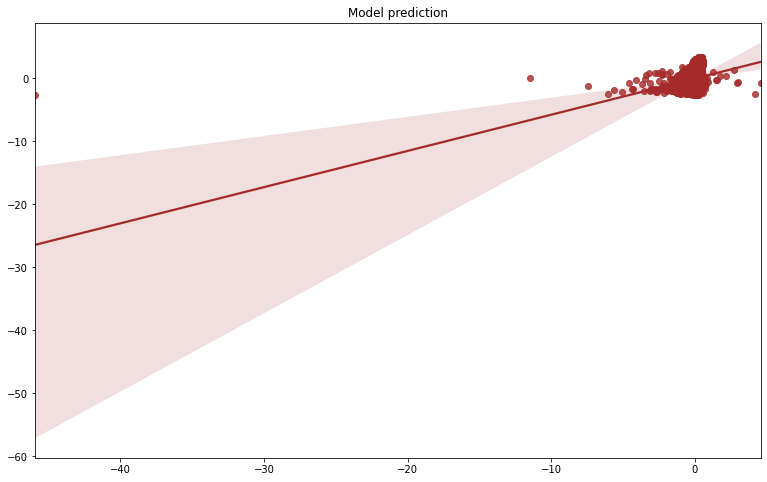

In [ ]:
plt.figure(figsize=(13,8))
sns.regplot(y=y_test, x=predictions, color='brown')
plt.title('Model prediction')

In [ ]:
error = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predictions.flatten()})
error.head(10)

,Actual Values,Predicted Values
0,-0.188613,0.013380
1,-0.090145,-0.542442
2,-0.519554,0.139883
3,-1.229045,0.236975
4,0.927779,0.304469
5,0.896108,-0.030990
6,-0.188613,-0.012593
7,0.623785,0.116457
8,0.103394,-0.137611
9,0.013600,-0.177258


this model not good for prediction

In [ ]:
=pipeline 

In [ ]:
from sklearn.pipeline import Pipeline
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', MinMaxScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', MinMaxScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', MinMaxScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.959517 (0.010354)
ScaledLASSO: -0.999457 (0.006403)
ScaledEN: -0.999457 (0.006403)
ScaledKNN: -0.693064 (0.011432)
ScaledCART: -0.060459 (0.003338)
ScaledGBM: -0.523821 (0.005252)


In [ ]:
# Using K_Nearest neighbour regressor
# running for different K values to know which yields the max accuracy.
from sklearn.neighbors import KNeighborsRegressor
score = []
for k in range(1,20):    
    clf = KNeighborsRegressor(n_neighbors = k,  weights = 'distance', p=1)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test, y_test))    

In [ ]:
k_max = score.index(max(score))+1
print( "At K = {}, Max Accuracy = {}".format(k_max, max(score)*100))

At K = 3, Max Accuracy = 82.25356053443525


In [ ]:
clf = KNeighborsRegressor(n_neighbors = k_max,  weights = 'distance', p=1)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test ))   
y_pred = clf.predict(X_test)

0.8225356053443525


In [ ]:
import joblib
# save the model to disk
filename = 'KNN_Regressor_MachineHack.sav'
joblib.dump(model, filename)

['KNN_Regressor_MachineHack.sav']

In [50]:
#Read testing data
df_test = pd.read_csv("Test.csv")
df_test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35


In [51]:
# Convert invoice date into epoch timestamps
df_test['InvoiceDate'] = pd.to_datetime(df_test['InvoiceDate'])
df_test['timestamp'] = ((df_test['InvoiceDate'] - dt.datetime(1970,1,1)).dt.total_seconds())/(10**6)
df_test.drop(columns=["InvoiceDate"], inplace=True)
df_test.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,timestamp
0,3139,1709,1079,3,16161.0,35,1298.38812
1,617,510,3457,1,17341.0,35,1291.81236
2,14653,604,694,36,15158.0,35,1319.55078
3,8634,1478,3473,2,16033.0,35,1309.17828
4,15546,3216,871,1,15351.0,35,1320.59604


In [52]:
data_test = df_test.drop(['InvoiceNo'],1, inplace= False)
data_test.head()

,StockCode,Description,Quantity,CustomerID,Country,timestamp
0,1709,1079,3,16161.0,35,1298.38812
1,510,3457,1,17341.0,35,1291.81236
2,604,694,36,15158.0,35,1319.55078
3,1478,3473,2,16033.0,35,1309.17828
4,3216,871,1,15351.0,35,1320.59604


In [ ]:
# apply the whole pipeline to data
results = clf.predict(data_test)

In [ ]:
results

array([[-0.18861339],
       [-0.51955375],
       [ 0.44587358],
       ...,
       [-0.51955375],
       [ 1.07707686],
       [ 0.90146406]])

In [ ]:
result = pd.DataFrame(data=results)
result.head()

,0
0,-0.188613
1,-0.519554
2,0.445874
3,-0.188613
4,1.960628


In [ ]:
# Applying inverse power transform to get back original form of unit price
a_inverse_transformed = power.inverse_transform(result)
a_inverse_transformed

array([[1.65      ],
       [1.25      ],
       [2.79304929],
       ...,
       [1.25      ],
       [4.87737653],
       [4.15      ]])

In [ ]:
result = pd.DataFrame(data=a_inverse_transformed).round(2)
result.head()

,0
0,1.65
1,1.25
2,2.79
3,1.65
4,12.75


In [ ]:
result.to_excel("HiringHack_UnitPricePrediction.xlsx")

In [ ]:
result.shape

(122049, 1)

In [ ]:
#Read testing data
sample = pd.read_csv("Sample Submission.csv")
sample.shape

(122049, 1)

In [ ]:
# using Light GBM

In [59]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, cross_val_predict

In [60]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

In [61]:
gbm = lgb.LGBMRegressor(**hyper_params)

In [62]:
y_train=y_train.ravel()

In [ ]:
gbm.fit(X_train, y_train,
        eval_set=[(X_train, y_train)],
        eval_metric='l1',
        early_stopping_rounds=1000)

Streaming output truncated to the last 5000 lines.
[4001]	training's auc: 0.975571	training's l2: 0.112433	training's l1: 0.223308
[4002]	training's auc: 0.975578	training's l2: 0.112401	training's l1: 0.223273
[4003]	training's auc: 0.975585	training's l2: 0.112361	training's l1: 0.223231
[4004]	training's auc: 0.975591	training's l2: 0.112331	training's l1: 0.223197
[4005]	training's auc: 0.975596	training's l2: 0.112318	training's l1: 0.223181
[4006]	training's auc: 0.975603	training's l2: 0.112273	training's l1: 0.223127
[4007]	training's auc: 0.975611	training's l2: 0.112229	training's l1: 0.223074
[4008]	training's auc: 0.975616	training's l2: 0.1122	training's l1: 0.223041
[4009]	training's auc: 0.975624	training's l2: 0.112156	training's l1: 0.222988
[4010]	training's auc: 0.975628	training's l2: 0.112145	training's l1: 0.222969
[4011]	training's auc: 0.975631	training's l2: 0.112126	training's l1: 0.222948
[4012]	training's auc: 0.975637	training's l2: 0.112094	training's l1: 

In [ ]:
y_pred = gbm.predict(X_train, num_iteration=gbm.best_iteration_)

In [ ]:
# Basic RMSE
print('The rmse of prediction is:', round(mean_squared_log_error(y_pred, y_train) ** 0.5, 5))

In [ ]:
y_pred_test = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
print('The rmse of prediction is:', round(mean_squared_log_error(y_pred_test, y_test) ** 0.5, 5))

In [ ]:
y_test2 = gbm.predict(data_test, num_iteration=gbm.best_iteration_)

In [ ]:
result = pd.DataFrame(data=y_test2)
result.head()

In [ ]:

# Applying inverse power transform to get back original form of unit price
a_inverse_transformed = power.inverse_transform(result)
a_inverse_transformed

result = pd.DataFrame(data=a_inverse_transformed).round(2)
result.head()

In [ ]:
result.shape

In [ ]:
result.to_excel("HiringHack_UnitPricePrediction_Light_GBM.xlsx")

In [41]:
#=======Voting Regressor used

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor

In [43]:
dt=DecisionTreeRegressor(random_state=0)
lg=GradientBoostingRegressor()
lr=LinearRegression()
rf=RandomForestRegressor()
classifier=[('Linear Regression',lr),('DecisionTreeRegressor',dt),('GradientBoosting',lg),('RandomForest',rf)]

In [53]:
vc=VotingRegressor(estimators=classifier)
vc.fit(X_train,y_train)

VotingRegressor(estimators=[('Linear Regression',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('DecisionTreeRegressor',
                             DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_w...
                             RandomFore

In [54]:
cases_pred = vc.predict(data_test)
cases_pred

array([ 0.06341262, -0.22576943,  0.13005824, ..., -0.26236534,
        0.55832649,  0.58668183])

In [55]:
result = pd.DataFrame(data=cases_pred)
result.head()

,0
0,0.063413
1,-0.225769
2,0.130058
3,0.023661
4,1.122380


In [56]:


# Applying inverse power transform to get back original form of unit price
a_inverse_transformed = power.inverse_transform(result)
a_inverse_transformed

result = pd.DataFrame(data=a_inverse_transformed).round(2)
result.head()

,0
0,2.03
1,1.60
2,2.15
3,1.97
4,5.09


In [57]:
result.shape

(122049, 1)

In [58]:
result.to_excel("HiringHack_UnitPricePrediction_VR.xlsx")